# 1. 세팅 및 데이터 불러오기

In [1]:
# !pip install --upgrade pyecharts==1.9.1
# !pip install pandasecharts

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pyecharts.globals import ThemeType # 테마 바꿀 때 사용
from pyecharts.charts import Timeline # 여러 그래프가 순차적으로 보이게 만들 때 사용
from pandasecharts import echart # 그래프를 그려줄  pandasecharts

In [3]:
# 한글 폰트 안 깨지기 위한 설정
import matplotlib
import matplotlib.font_manager as fm

font_location = 'C:/Windows/Fonts/Malgun.ttf' 

font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
matplotlib.rc('font', family=font_name)

Malgun Gothic


In [4]:
# 소수점 둘째 자리까지 출력옵션
pd.options.display.float_format = '{:.2f}'.format

# # 출력 옵션
# pd.options.display.max_rows = 6

In [ ]:
df_first = pd.read_csv('./eda-proj-fc-purchase.csv')

In [6]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   거래id       159328 non-null  int64 
 1   유형         159328 non-null  object
 2   고객id       159328 non-null  int64 
 3   코스ID       159328 non-null  int64 
 4   사이트        159328 non-null  object
 5   포맷         159328 non-null  object
 6   카테고리       159328 non-null  object
 7   코스(상품) 이름  159328 non-null  object
 8   거래일자       159328 non-null  object
 9   쿠폰이름       159328 non-null  object
 10  판매가격       159328 non-null  object
 11  결제수단       159328 non-null  object
 12  실거래금액      159328 non-null  int64 
 13  쿠폰할인액      159328 non-null  object
 14  거래금액       159328 non-null  object
 15  환불금액       159328 non-null  object
dtypes: int64(4), object(12)
memory usage: 19.4+ MB


# 2. 전처리

In [7]:
df = df_first.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   거래id       159328 non-null  int64 
 1   유형         159328 non-null  object
 2   고객id       159328 non-null  int64 
 3   코스ID       159328 non-null  int64 
 4   사이트        159328 non-null  object
 5   포맷         159328 non-null  object
 6   카테고리       159328 non-null  object
 7   코스(상품) 이름  159328 non-null  object
 8   거래일자       159328 non-null  object
 9   쿠폰이름       159328 non-null  object
 10  판매가격       159328 non-null  object
 11  결제수단       159328 non-null  object
 12  실거래금액      159328 non-null  int64 
 13  쿠폰할인액      159328 non-null  object
 14  거래금액       159328 non-null  object
 15  환불금액       159328 non-null  object
dtypes: int64(4), object(12)
memory usage: 19.4+ MB


In [9]:
# 판매가격, 거래금액, 환불금액, 쿠폰할인액 : object 타입을 int 타입으로 변경
df.loc[df['판매가격'] == '-', '판매가격'] = 0
df['판매가격'] = df['판매가격'].astype('int')

df.loc[df['거래금액'] == '-', '거래금액'] = 0
df['거래금액'] = df['거래금액'].astype('int')

df.loc[df['환불금액'] == '-', '환불금액'] = 0
df['환불금액'] = df['환불금액'].astype('int')

df.loc[df['쿠폰할인액'] == '-', '쿠폰할인액'] = 0
df['쿠폰할인액'] = df['쿠폰할인액'].astype('int')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   거래id       159328 non-null  int64 
 1   유형         159328 non-null  object
 2   고객id       159328 non-null  int64 
 3   코스ID       159328 non-null  int64 
 4   사이트        159328 non-null  object
 5   포맷         159328 non-null  object
 6   카테고리       159328 non-null  object
 7   코스(상품) 이름  159328 non-null  object
 8   거래일자       159328 non-null  object
 9   쿠폰이름       159328 non-null  object
 10  판매가격       159328 non-null  int32 
 11  결제수단       159328 non-null  object
 12  실거래금액      159328 non-null  int64 
 13  쿠폰할인액      159328 non-null  int32 
 14  거래금액       159328 non-null  int32 
 15  환불금액       159328 non-null  int32 
dtypes: int32(4), int64(4), object(8)
memory usage: 17.0+ MB


In [10]:
# 거래일자에서 오후/오전 추출
df['am/pm'] = df['거래일자'].str.extract('(오후|오전)')

# 오전은 AM으로, 오후는 PM으로 변경
df['am/pm'] = df['am/pm'].mask(df['am/pm'] == '오전', 'AM').mask(df['am/pm']=='오후', 'PM')

# 거래일자에서 오전 또는 오후를 기준으로 나눈 리스트 반환
df['date/time'] = df['거래일자'].str.split('오후|오전')

# 거래 날짜 + AM 또는 PM + 거래 시간 합치기
df['거래일자'] = df['date/time'].apply(lambda x:x[0]) + df['am/pm'] + df['date/time'].apply(lambda x:x[1])

In [11]:
# 거래일자 타입을 datetime으로 바꾸기
df['거래일자'] = pd.to_datetime(df['거래일자'], format='%Y. %m. %d. %p %I:%M:%S')

In [12]:
# 전처리 중 생성했던 컬럼 삭제
df = df.drop(columns=['am/pm', 'date/time'])

# 3. columns 분석

## 1. 거래id

In [13]:
df['거래id'].value_counts() # 판매내역의 고유값

2417084    1
1821516    1
1821606    1
1821595    1
1821592    1
          ..
2120135    1
2120128    1
2120120    1
2120117    1
1486194    1
Name: 거래id, Length: 159328, dtype: int64

## 2. 유형
### 1) 유형의 구성

In [14]:
df_type = df['유형'].value_counts().reset_index().set_axis(['유형', 'count'], axis=1) # PAYMENT, REFUND
df_type['ratio'] = df_type['count'] / df_type['count'].sum()
df_type

,유형,count,ratio
0,PAYMENT,148010,0.93
1,REFUND,11318,0.07


In [15]:
df_type.echart.pie(
    x='유형',
    y='count',
    theme=ThemeType.ESSOS, title='PAYMENT vs. REFUND', subtitle='판매건 기준 PAYMENT, REFUND 차지율').render_notebook()

유형 컬럼은 **PAYMENT, REFUND**으로 구성 되어있다.

그러나 **93%가 PAYMENT**인 만큼, **REFUND 데이터는 고려하지 않아도 괜찮을 것으로 보인다.**

그래도 REFUND 데이터를 통해 살펴볼 수 있는 인사이트를 확인해보자.

### 2) REFUND DATA

In [16]:
df_refund = df[df['유형'] == 'REFUND'] # 11,318건 환불
df_refund

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
1112,2407283,REFUND,92793,213905,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 21개 프로젝트로 완성하는 인터랙티브 웹 개발 with Three...,2022-12-30 16:12:47,-,158000,CARD,-158000,0,0,-158000
1139,2406979,REFUND,94570,214402,FASTCAMPUS,올인원,데이터 사이언스,빵형의 수학 없이 뽀개는 인공지능 입문,2022-12-30 15:12:29,-,130000,CARD,-65000,0,0,-65000
1148,2406934,REFUND,68675,203935,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,2022-12-30 15:12:09,-,222000,CARD,-128000,0,0,-128000
1150,2406926,REFUND,5477,213244,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 30개 사례로 배우는 Anomaly Detection 알고리즘 구...,2022-12-30 14:12:16,-,226000,POINT,-221004,0,0,-221004
1154,2406884,REFUND,51192,211087,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 서비스 기획의 모든 것,2022-12-30 14:12:25,-,185000,TRANS,-185000,0,0,-185000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158633,1554321,REFUND,71667,206848,FASTCAMPUS,RED,데이터 사이언스,The RED : Youtube 알고리즘 개발자 이준석의 추천시스템 마스터 클래스,2022-01-03 10:01:54,-,709000,TRANS,-709000,0,0,-709000
158638,1554311,REFUND,53721,203720,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,2022-01-03 10:01:34,-,220000,CARD,-190000,0,0,-190000
158640,1554309,REFUND,88030,204366,FASTCAMPUS,올인원,마케팅,올인원 패키지 : 30개 글감으로 에세이 작가되기 BY.정영욱,2022-01-03 10:01:25,-,136000,POINT,-136000,0,0,-136000
158642,1554306,REFUND,69980,202072,FASTCAMPUS,올인원,프로그래밍,올인원 패키지 : 코딩 첫 걸음 프로젝트,2022-01-03 10:01:01,-,162000,CARD,-162000,0,0,-162000


In [17]:
# 지불 건 Data
df_payment = df[df['유형'] == 'PAYMENT']
df_payment.head(3)

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31 22:12:33,-,189000,TRANSFER,159000,0,159000,0
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022-12-30 18:12:57,-,501000,TRANSFER,501000,0,501000,0
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022-12-31 23:12:15,-,549000,CARD,549000,0,549000,0


In [18]:
# PAYMENT 데이터의 특정 칼럼만 추출
df_payment_temp = df_payment[['고객id', '코스ID', '거래id']].rename(columns={'거래id':'구매건_거래id'})

# REFUND 데이터의 특정 칼럼만 추출
df_refund_temp = df_refund[['고객id', '코스ID', '거래id']].rename(columns={'거래id':'환불건_거래id'})

# 고객id와 코스ID를 기준으로 병합
df_refund_payment = df_refund_temp.merge(df_payment_temp, on=['고객id', '코스ID'])
df_refund_payment

,고객id,코스ID,환불건_거래id,구매건_거래id
0,81443,212784,2393624,2209045
1,23890,203778,2363395,2342018
2,5190,207343,2363247,1845612
3,35478,212435,2344278,2325942
4,12543,211727,2341829,2029748
...,...,...,...,...
99,97546,203720,1563579,1936630
100,2287,205949,1560366,1683607
101,73400,206185,1559704,1621351
102,56216,203720,1559603,1561644


환불 내역을 보면, **총 11,318건**이다.

하지만, 환불 건 중 **104건만이 2022년에 구매한 건**이다.

**11,214건(=11,318-104) 즉, 상당수가 이전 해에 구매했던 강의를 환불한 건**들이다.

In [19]:
# REFUND 거래일자를 담은 데이터 추출
ref_date_temp = df[['거래id', '거래일자']].rename(columns={'거래id':'환불건_거래id', '거래일자':'환불거래일자'})

# PAYMENT 거래일자를 담은 데이터 추출
pay_date_temp = df[['거래id', '거래일자']].rename(columns={'거래id':'구매건_거래id', '거래일자':'구매거래일자'})

# df_refund_payment에 REFUND, PAYMENT 거래일자 데이터 병합
df_refund_payment = df_refund_payment.merge(pay_date_temp, how='left').merge(ref_date_temp, how='left')


df_refund_payment['환불일-거래일'] = df_refund_payment['환불거래일자'] - df_refund_payment['구매거래일자']
df_refund_payment

,고객id,코스ID,환불건_거래id,구매건_거래id,구매거래일자,환불거래일자,환불일-거래일
0,81443,212784,2393624,2209045,2022-10-14 12:10:08,2022-12-27 13:12:14,74 days 01:02:06
1,23890,203778,2363395,2342018,2022-12-12 15:12:29,2022-12-19 10:12:59,6 days 19:00:30
2,5190,207343,2363247,1845612,2022-05-11 15:05:28,2022-12-19 09:12:23,221 days 18:06:55
3,35478,212435,2344278,2325942,2022-12-06 13:12:17,2022-12-13 14:12:42,7 days 01:00:25
4,12543,211727,2341829,2029748,2022-07-31 23:07:01,2022-12-12 14:12:06,133 days 15:05:05
...,...,...,...,...,...,...,...
99,97546,203720,1563579,1936630,2022-06-26 20:06:42,2022-01-05 11:01:44,-173 days +14:55:02
100,2287,205949,1560366,1683607,2022-02-21 18:02:21,2022-01-04 14:01:13,-49 days +19:58:52
101,73400,206185,1559704,1621351,2022-01-26 16:01:41,2022-01-04 11:01:56,-23 days +19:00:15
102,56216,203720,1559603,1561644,2022-01-04 20:01:56,2022-01-04 10:01:58,-1 days +14:00:02


In [20]:
df_refund_payment['고객id'].value_counts() # 고객id 44028, 61235는 2번 출현

df_refund_payment[df_refund_payment['고객id'] == 44028] # 환불 > 구매 > 환불(20, 21)
df_refund_payment[df_refund_payment['고객id'] == 61235] # 구매 > 환불 > 구매(39, 40)

# 특별한 경우(이상치)이기 때문에 제외
df_refund_payment = df_refund_payment.drop([20, 21, 39, 40], axis=0)
df_refund_payment.head(2)

,고객id,코스ID,환불건_거래id,구매건_거래id,구매거래일자,환불거래일자,환불일-거래일
0,81443,212784,2393624,2209045,2022-10-14 12:10:08,2022-12-27 13:12:14,74 days 01:02:06
1,23890,203778,2363395,2342018,2022-12-12 15:12:29,2022-12-19 10:12:59,6 days 19:00:30


In [21]:
df_refund_payment

,고객id,코스ID,환불건_거래id,구매건_거래id,구매거래일자,환불거래일자,환불일-거래일
0,81443,212784,2393624,2209045,2022-10-14 12:10:08,2022-12-27 13:12:14,74 days 01:02:06
1,23890,203778,2363395,2342018,2022-12-12 15:12:29,2022-12-19 10:12:59,6 days 19:00:30
2,5190,207343,2363247,1845612,2022-05-11 15:05:28,2022-12-19 09:12:23,221 days 18:06:55
3,35478,212435,2344278,2325942,2022-12-06 13:12:17,2022-12-13 14:12:42,7 days 01:00:25
4,12543,211727,2341829,2029748,2022-07-31 23:07:01,2022-12-12 14:12:06,133 days 15:05:05
...,...,...,...,...,...,...,...
99,97546,203720,1563579,1936630,2022-06-26 20:06:42,2022-01-05 11:01:44,-173 days +14:55:02
100,2287,205949,1560366,1683607,2022-02-21 18:02:21,2022-01-04 14:01:13,-49 days +19:58:52
101,73400,206185,1559704,1621351,2022-01-26 16:01:41,2022-01-04 11:01:56,-23 days +19:00:15
102,56216,203720,1559603,1561644,2022-01-04 20:01:56,2022-01-04 10:01:58,-1 days +14:00:02


이상치 제외를 통해 2022년에 판매와 환불 모두 일어난 경우는 **100건**이다.

In [22]:
from datetime import timedelta

len(df_refund_payment[df_refund_payment['환불일-거래일'] > timedelta(0)]) # 46(구매 후 환불)
len(df_refund_payment[df_refund_payment['환불일-거래일'] < timedelta(0)]) # 54(환불 후 구매)

df.loc[(df['고객id'] == 56216) & (df['코스ID'] == 203720)] # 203720 >> 환불 후 프로모션 건으로 갈아타기

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
156210,1561644,PAYMENT,56216,203720,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,2022-01-04 20:01:56,[프로모션] 12월 1+1 수강권 이벤트,221000,CARD,66000,155000,66000,0
156748,1559603,REFUND,56216,203720,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,2022-01-04 10:01:58,-,220000,CARD,-220000,0,0,-220000


**2022년에 같은 강의를 환불과 구매 모두** 진행한 환불한 100건 중, 절반 가량(54건)이 **환불한 후 다시 구매**한 건으로 확인되었다.

**54건은 실제로 환불한 건이라고 볼 수도, 실제 구매한 것이라고 볼 수 없기 때문에, 56개 건은 제외하여 분석하는 것이 더 타당할 것으로 보인다**

하지만, 2022년도 데이터에는 전년도에 구매한 강의를 환불한 건도 포함되어 있다.

만약 전년도 12월에 구매 후 2022년 초에 환불했다고 하면, 위의 54건과 비슷한 건이라고 볼 수 있다.

**현재 전년도 데이터를 확인 할 수 없기 때문에, 공평하게 54건을 제외하지 않고 데이터 분석을 진행**한다.

더불어, 환불 데이터는 구매 데이터에 비해 소규모이기에 환불 건을 전처리 하지 않은 것의 영향력은 크지 않을 것으로 판단된다.

[참고] 2022년도 환불 후 구매한 경우, 쿠폰을 사용해서 재구매했는지 여부 확인

In [25]:
# 2022년에 환불 후 재구매한 경우
refund_payment_54 = df_refund_payment[df_refund_payment['환불일-거래일'] < timedelta(0)]
refund_payment_54_full = refund_payment_54.merge(df[['고객id', '코스ID', '유형', '쿠폰이름']], how='left', on=['고객id', '코스ID'])
refund_payment_54_full

# 쿠폰 사용 여부에 따른 구분
refund_payment_54_full['쿠폰사용여부'] = ~(refund_payment_54_full[refund_payment_54_full['유형'] == 'PAYMENT']['쿠폰이름'] == '-')
refund_payment_54_full.head(3)

,고객id,코스ID,환불건_거래id,구매건_거래id,구매거래일자,환불거래일자,환불일-거래일,유형,쿠폰이름,쿠폰사용여부
0,43710,213604,2341156,2395247,2022-12-28 12:12:36,2022-12-12 10:12:16,-17 days +21:59:40,PAYMENT,-,False
1,43710,213604,2341156,2395247,2022-12-28 12:12:36,2022-12-12 10:12:16,-17 days +21:59:40,REFUND,-,NaN
2,3349,213780,2247278,2250818,2022-11-04 08:11:28,2022-11-02 15:11:34,-2 days +07:00:06,PAYMENT,[WELCOME] 온라인 강의 2만원 할인,True


In [28]:
# cond1 = refund_payment_56_full['쿠폰사용여부'] == True
# cond2 = refund_payment_56_full['쿠폰사용여부'] == False
# refund_payment_56_full['쿠폰사용여부'] = refund_payment_56_full['쿠폰사용여부'].mask(cond1, '사용').mask(cond2, '미사용')
refund_payment_54_coupon = refund_payment_54_full.groupby('쿠폰사용여부')['유형'].count().reset_index().rename({'유형':'count'}, axis=1)
refund_payment_54_coupon

,쿠폰사용여부,count
0,False,22
1,True,32


In [29]:
refund_payment_54_coupon.echart.pie(
    x='쿠폰사용여부',
    y='count',
    theme=ThemeType.ESSOS, title='2022년 환불 후 재구매 건의 쿠폰 사용여부').render_notebook()

2022년도에 **환불 후 쿠폰을 사용하여 재구매**한 경우를 확인한 결과, **절반이 넘는 것으로 확인**되었다.

In [30]:
# 환불 후 얼마만에 구매했는지 확인
refund_payment_54_coupon_full = refund_payment_54_full.loc[refund_payment_54_full['쿠폰사용여부']==True]

# 환불일-거래일 평균
refund_payment_54_coupon_full['환불일-거래일'].mean()

Timedelta('-99 days +09:21:17.062500')

In [31]:
# 환불일-거래일 최댓값
refund_payment_54_coupon_full['환불일-거래일'].max()

Timedelta('-1 days +14:00:02')

In [32]:
# 환불일-거래일 최솟값
refund_payment_54_coupon_full['환불일-거래일'].min()

Timedelta('-294 days +12:50:32')

Text(0.5, 1.0, '환불~재구매까지 소요시간')

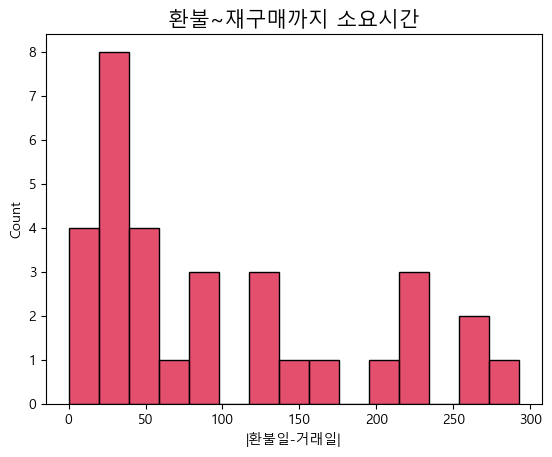

In [33]:
# 환불일-거래일 < 0인 경우이므로, 절대값으로 변경 후 히스토그램 출력
refund_payment_54_coupon_full_abs = refund_payment_54_coupon_full.copy()
refund_payment_54_coupon_full_abs['|환불일-거래일|'] = np.abs(refund_payment_54_coupon_full_abs['환불일-거래일'])
refund_payment_54_coupon_full_abs['|환불일-거래일|'] = refund_payment_54_coupon_full_abs['|환불일-거래일|'].astype('str').str.split(' days').str[0].astype('int')
sns.histplot(data=refund_payment_54_coupon_full_abs, x='|환불일-거래일|', bins=15, color='#DC143C')
plt.title('환불~재구매까지 소요시간', fontsize=15)

2022년도에 환불 후 재구매한 경우, **환불 후 20~40일 정도에 재구매한 경우가 눈에 띄게 많았다.(다른 경우보다 최소 2배)**

**쿠폰 발급을 통한 환불 고객 재구매 유도 효과**가 있었음을 확인 할 수 있다.

In [34]:
# 2022년 환불 후 재구매한 경우, 어떤 쿠폰을 사용했는지 확인
refund_payment_54_coupon_full['쿠폰구분'] = refund_payment_54_coupon_full['쿠폰이름'].str.extract('(\[.+\])')
refund_payment_54_coupon_full['쿠폰구분'].value_counts()

C:\Users\rlaal\AppData\Local\Temp\ipykernel_2104\2586812260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refund_payment_54_coupon_full['쿠폰구분'] = refund_payment_54_coupon_full['쿠폰이름'].str.extract('(\[.+\])')


[WELCOME]              16
[프로모션]                  7
[증정]                    4
[20% 할인쿠폰]              1
[신규가입자는 쿠폰 더!]          1
[4월이니까? 총 4만원 할인쿠폰]     1
[럭키룰렛]                  1
[5월 쿠폰]                 1
Name: 쿠폰구분, dtype: int64

In [35]:
refund_payment_54_coupon_disc = refund_payment_54_coupon_full.groupby('쿠폰구분')['유형'].count().reset_index().rename({'유형':'count'}, axis=1).sort_values('count', ascending=False)
cond1 = refund_payment_54_coupon_disc['count'] < 2
refund_payment_54_coupon_disc['쿠폰구분'] = refund_payment_54_coupon_disc['쿠폰구분'].mask(cond1, '기타')
refund_payment_54_coupon_disc = refund_payment_54_coupon_disc.groupby('쿠폰구분')['count'].sum().reset_index().sort_values('count', ascending=False)
refund_payment_54_coupon_disc

,쿠폰구분,count
0,[WELCOME],16
2,[프로모션],7
3,기타,5
1,[증정],4


In [36]:
refund_payment_54_coupon_disc.echart.pie(
    x='쿠폰구분',
    y='count',
    theme=ThemeType.ESSOS, title='2022년 환불 후 쿠폰사용 재구매 건 쿠폰 사용 종류', legend_opts={'pos_left':"60%", 'pos_top':"10%"}).render_notebook()

2022년 환불 후 재구매할 때 쿠폰을 사용한 경우, **절반 정도가 WELCOME 쿠폰을 사용**한 것으로 확인되었다.

In [37]:
refund_payment_54_coupon_full.loc[refund_payment_54_coupon_full['쿠폰구분'] == '[WELCOME]', '쿠폰이름']

2                 [WELCOME] 온라인 강의 2만원 할인
6                     [WELCOME] 디자인 3만원할인
10                [WELCOME] 온라인 강의 3만원 할인
12                [WELCOME] 온라인 강의 3만원 할인
18                [WELCOME] 온라인 강의 2만원 할인
24                [WELCOME] 온라인 강의 3만원 할인
28                [WELCOME] 온라인 강의 3만원 할인
32            [WELCOME] The Red 강의 3만원 할인
46                [WELCOME] 온라인 강의 3만원 할인
50                    [WELCOME] 디자인 3만원할인
70               [WELCOME] 3월이니까? 3만원 할인!
74                [WELCOME] 온라인 강의 3만원 할인
94                [WELCOME] 온라인 강의 3만원 할인
100                [WELCOME] 2월이니까 2만원 할인
102    [WELCOME] 처음이라면 누구나 데이터사이언스 5만원 할인
106              [WELCOME] 3월이니까? 3만원 할인!
Name: 쿠폰이름, dtype: object

In [38]:
refund_payment_54_coupon_full.loc[refund_payment_54_coupon_full['쿠폰구분'] == '[프로모션]', '쿠폰이름']

54          [프로모션] 6월 1+1 이벤트
62      [프로모션] 3월 1+1 수강권 이벤트
66          [프로모션] 6월 1+1 이벤트
76     [프로모션] 8월 100% 페이백 이벤트
84      [프로모션] 1월 1+1 수강권 이벤트
86     [프로모션] 8월 100% 페이백 이벤트
104    [프로모션] 12월 1+1 수강권 이벤트
Name: 쿠폰이름, dtype: object

In [39]:
refund_payment_54_coupon_full.loc[refund_payment_54_coupon_full['쿠폰구분'] == '[증정]', '쿠폰이름']

4     [증정] 온라인강의 결제 금액과 동일한 100% 페이백 쿠폰
16    [증정] 온라인강의 결제 금액과 동일한 100% 페이백 쿠폰
34    [증정] 온라인강의 결제 금액과 동일한 100% 페이백 쿠폰
60    [증정] 온라인강의 결제 금액과 동일한 100% 페이백 쿠폰
Name: 쿠폰이름, dtype: object

WELCOME 쿠폰의 경우, **할인을 받기 위해 사용하는 쿠폰이다**.

**프로모션 쿠폰의 경우는 1+1 등, 증정 쿠폰은 100% 페이백 쿠폰**이다.

**이 쿠폰들이 매출증가에 이바지했다고 할 수는 없지만**,

**환불한 고객이 패스트캠퍼스 강의 상품을 다시 구매하도록 하는데 효과가 있었다**고 볼 수 있다.

3.고객id 내용(아래 내용 참고)에 따라, 패스트캠퍼스의 **판매 건은 2개 이상 구매한 고객들에 의해 발생**하기에 위와 관련된 **마케팅 전략은 적절**했다고 볼 수 있다.

## 3. 고객id

### 1) 고객 수 파악

In [40]:
# 총 고객 수
df_payment['고객id'].value_counts() # 77210명

# 재구매한 고객 수(2개 이상 들은 고객 수)
df_payment['고객id'].value_counts()[df_payment['고객id'].value_counts() > 1] # 43486명

# 1개 강의만 구매한 고객 수
df_payment['고객id'].value_counts()[df_payment['고객id'].value_counts() == 1] # 33724명

7039     1
56243    1
92670    1
67803    1
23180    1
        ..
36262    1
27067    1
67514    1
82513    1
39658    1
Name: 고객id, Length: 33724, dtype: int64

### 2-1) 가설 설정 : 패스트캠퍼스의 판매 건은 대부분 2개 이상 구매한 사람들에 의해 발생한다.

In [41]:
# 강의 구매 개수에 따른 고객 분류
client_lecture_count = df_payment['고객id'].value_counts().reset_index().set_axis(['고객id', '구매count'], axis=1).groupby('구매count')['고객id'].count().reset_index().rename(columns={'고객id':'고객수'})
client_lecture_count['강의수'] = client_lecture_count['구매count'] * client_lecture_count['고객수']
client_lecture_count

,구매count,고객수,강의수
0,1,33724,33724
1,2,24787,49574
2,3,12375,37125
3,4,4551,18204
4,5,1353,6765
5,6,342,2052
6,7,64,448
7,8,11,88
8,9,1,9
9,10,1,10


Text(0.5, 1.0, '구매 개수에 따른 고객 수 그래프')

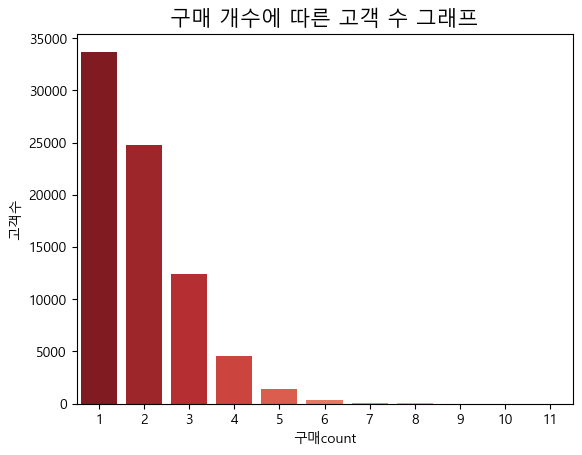

In [42]:
# 구매 개수에 따른 고객 수 비율 그래프
sns.barplot(data=client_lecture_count, x='구매count', y='고객수', palette='Reds_r')
plt.title("구매 개수에 따른 고객 수 그래프", fontsize=15)

### 2-1) 가설 확인 결과

강의 구매 개수별로 고객 수를 확인하면, 강의를 1개 구매한 고객이 가장 많다(44%).

하지만 강의 구매 개수별 총 강의 수를 확인하면, 강의를 2개 구매한 고객으로 인한 구매 건이 가장 많다(33%).

2개 이상 기준으로는 대부분(77%)을 차지한다.

따라서, **패스트캠퍼스 판매 건은 강의를 2개 이상 구매한 사람들에 의해 발생**한다.

### 3) 강의 구매 개수 변화에 따른 고객 수 감소 비율 확인

In [43]:
client_lecture_count['고객수_shift'] = client_lecture_count['고객수'].shift(-1)
client_lecture_count
client_lecture_count['구매count감소비율(고객수기준)'] = (client_lecture_count['고객수'] - client_lecture_count['고객수_shift']) / client_lecture_count['고객수']
client_lecture_count

,구매count,고객수,강의수,고객수_shift,구매count감소비율(고객수기준)
0,1,33724,33724,24787.00,0.27
1,2,24787,49574,12375.00,0.50
2,3,12375,37125,4551.00,0.63
3,4,4551,18204,1353.00,0.70
4,5,1353,6765,342.00,0.75
5,6,342,2052,64.00,0.81
6,7,64,448,11.00,0.83
7,8,11,88,1.00,0.91
8,9,1,9,1.00,0.00
9,10,1,10,1.00,0.00


In [44]:
client_lecture_count['강의수_shift'] = client_lecture_count['강의수'].shift(-1)
client_lecture_count
client_lecture_count['구매count감소비율(강의수기준)'] = (client_lecture_count['강의수'] - client_lecture_count['강의수_shift']) / client_lecture_count['강의수']
client_lecture_count

,구매count,고객수,강의수,고객수_shift,구매count감소비율(고객수기준),강의수_shift,구매count감소비율(강의수기준)
0,1,33724,33724,24787.00,0.27,49574.00,-0.47
1,2,24787,49574,12375.00,0.50,37125.00,0.25
2,3,12375,37125,4551.00,0.63,18204.00,0.51
3,4,4551,18204,1353.00,0.70,6765.00,0.63
4,5,1353,6765,342.00,0.75,2052.00,0.70
5,6,342,2052,64.00,0.81,448.00,0.78
6,7,64,448,11.00,0.83,88.00,0.80
7,8,11,88,1.00,0.91,9.00,0.90
8,9,1,9,1.00,0.00,10.00,-0.11
9,10,1,10,1.00,0.00,11.00,-0.10


In [45]:
display(client_lecture_count.echart.bar(
    x='구매count',
    ys=['구매count감소비율(고객수기준)'],
    theme=ThemeType.ESSOS, title='구매개수에 따른 고객수 감소율 그래프', legend_opts={'pos_left':"70%", 'pos_top':"10%"}).render_notebook())

강의 구매 개수 변화에 따른 고객 수 감소 비율 확인 결과,

**구매한 강의 수가 1개에서 2개로 갈 때 감소하는 비율이 월등히 작다.**

함께 팔기 전략에 의해 2개를 구매한 고객이 많은 것이라는 새로운 가설을 생각해볼 수 있다.

### 4-1) 가설 설정 : 1+1 마케팅 전략으로 구매 개수가 1개에서 2개로 올라갈 때 구매감소 비율이 다른 구간보다 작다.

In [46]:
# 쿠폰 이름에 1+1이 포함된 쿠폰을 사용한 PAYMETN 데이터
coupon_plus = df_payment[df_payment['쿠폰이름'].apply(lambda x: '1+1' in x)].sort_values('고객id') # 16372개

# 1+1 쿠폰을 사용한 고객이 구매한 강의 수가 2개인지 확인
# 1+1 쿠폰을 쓴 고객id 안에 2개를 구매한 고객id가 있는지 확인
count_2_temp = df_payment['고객id'].value_counts()[df_payment['고객id'].value_counts() == 2]

# 1+1 쿠폰 사용한 경우 : True, 사용하지 않은 경우 : False
match_2_coupon = pd.DataFrame(pd.Series(count_2_temp.index.isin(coupon_plus['고객id'])).value_counts()).reset_index().set_axis(['일치여부','count'],axis=1)

# 2개 강의를 구매한 고객 중, 1+1 쿠폰을 사용한 고객과 사용하지 않은 고객 비율
match_2_coupon.echart.pie(x='일치여부', y='count', theme=ThemeType.ESSOS, title='2개 강의 구매한 고객들의 1+1쿠폰 사용여부', legend_opts={'pos_left':"80%", 'pos_top':"10%"}).render_notebook()

### 4-2) 가설 확인 결과

- 가설 : 1+1 마케팅 전략으로 구매 개수가 1개에서 2개로 올라갈 때 구매감소 비율이 다른 구간보다 작다.

강의를 2개 구매한 사람들의 상당수가 1+1 쿠폰을 사용하지 않았다.

하지만, **2개를 구매한 사람들의 20%가 1+1 쿠폰을 사용**하였고, 이는 작은 수치는 아니다.

그렇다면 **21.02%라는 비율이 어느 정도의 영향력을 의미**하는지 살펴보자

In [47]:
# 2개 강의를 구매한 사람들 중 1+1 쿠폰을 사용한 고객(21.02%)이 쿠폰이 없어 1개만 구매했다고 가정했을 때, 감소 비율을 다시 비교해보자

client_lecture_count_temp = client_lecture_count[['구매count', '고객수']]
client_lecture_count_temp.loc[0, '고객수'] = client_lecture_count_temp.loc[0, '고객수'] + client_lecture_count_temp.loc[1, '고객수'] * 0.2102
client_lecture_count_temp.loc[1, '고객수'] = client_lecture_count_temp.loc[1, '고객수'] - client_lecture_count_temp.loc[1, '고객수'] * 0.2102
client_lecture_count_temp

,구매count,고객수
0,1,38934.23
1,2,19576.77
2,3,12375.00
3,4,4551.00
4,5,1353.00
5,6,342.00
6,7,64.00
7,8,11.00
8,9,1.00
9,10,1.00


In [48]:
client_lecture_count_temp['고객수_shift'] = client_lecture_count_temp['고객수'].shift(-1)
client_lecture_count_temp['구매count감소비율(고객수기준)'] = (client_lecture_count_temp['고객수'] - client_lecture_count_temp['고객수_shift']) / client_lecture_count_temp['고객수']
client_lecture_count_temp

C:\Users\rlaal\AppData\Local\Temp\ipykernel_2104\2627267835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_lecture_count_temp['고객수_shift'] = client_lecture_count_temp['고객수'].shift(-1)
C:\Users\rlaal\AppData\Local\Temp\ipykernel_2104\2627267835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_lecture_count_temp['구매count감소비율(고객수기준)'] = (client_lecture_count_temp['고객수'] - client_lecture_count_temp['고객수_shift']) / client_lecture_count_temp['고객수']


,구매count,고객수,고객수_shift,구매count감소비율(고객수기준)
0,1,38934.23,19576.77,0.50
1,2,19576.77,12375.00,0.37
2,3,12375.00,4551.00,0.63
3,4,4551.00,1353.00,0.70
4,5,1353.00,342.00,0.75
5,6,342.00,64.00,0.81
6,7,64.00,11.00,0.83
7,8,11.00,1.00,0.91
8,9,1.00,1.00,0.00
9,10,1.00,1.00,0.00


In [49]:
client_lecture_count_temp.echart.bar(x='구매count', ys=['구매count감소비율(고객수기준)'], theme=ThemeType.ESSOS, title='[가정 시] 강의 개수에 따른 고객수 감소 비율', legend_opts={'pos_left':"70%", 'pos_top':"10%"}).render_notebook()

기존의 경우인 아래 그래프와 비교해보자

In [50]:
client_lecture_count.echart.bar(x='구매count', ys=['구매count감소비율(고객수기준)'], theme=ThemeType.ESSOS, title='[기존] 강의 개수에 따른 고객수 감소 비율', legend_opts={'pos_left':"70%", 'pos_top':"10%"}).render_notebook()

2개를 구매한 고객 중 1+1 쿠폰을 사용한 고객이 이 쿠폰이 없었더라면 1개를 구매했을 것이라는 가정했을 때,

강의를 2개 구매한 고객과 1개 구매한 고객 간의 차이가 더 커졌다는 것을 알 수 있다.

즉, **1+1 쿠폰에 의해 원래는 1개를 구매할 고객들이 2개를 구매하게 했다고 볼 수 있다**.

패스트캠퍼스 **강의 판매 발생에 2개 이상 구매한 고객들의 영향력이 크다**는 것을 감안했을 때, **1+1 쿠폰 전략은 적절한 전략**이었다고 볼 수 있다.

## 4. 코스ID

In [51]:
# 가장 많은 고객이 구매한 코스 ID(TOP100)
course_id_100 = df_payment['코스ID'].value_counts()[:100].reset_index().set_axis(['코스ID', 'count'], axis=1)
course_id_100

,코스ID,count
0,204373,2703
1,211368,2518
2,203720,2473
3,203525,2106
4,206356,1828
...,...,...
95,207766,500
96,203527,490
97,205080,489
98,204207,489


In [52]:
# 가장 많이 판매된 TOP100 강의는 어떤 카테고리에 포함되어 있는지 확인
course_id_100_category_count = df_payment.loc[df_payment['코스ID'].isin(course_id_100['코스ID']), '카테고리'].value_counts().reset_index().set_axis(['카테고리', 'count'], axis=1)
display(course_id_100_category_count.echart.pie(
    x='카테고리',
    y='count',
    theme=ThemeType.ESSOS).render_notebook())

가장 많이 판매된 TOP100 강의는 프로그래밍, 데이터사이언스 카테고리에 절반 이상 속해 있다.

특히, **프로그래밍 카테고리가 가장 많이 팔리는 강의들을 포함**하고 있다.

많은 사람들이 프로그래밍 강의를 많이 구매한다는 것을 알 수 있다.

**고객 중 많은 이들이 프로그래밍 분야에 관심이 있는 만큼, 이 카테고리의 강의 컨텐츠의 양과 질을 늘린다면 매출 상승을 기대해 볼 수 있다.**

## 5. 사이트

In [53]:
df['사이트'].value_counts() # 159328

FASTCAMPUS    159328
Name: 사이트, dtype: int64

해당 데이터(df)는 패스트 캠퍼스 사이트를 통해 유통되는 온라인 콘텐츠이 판매 내역임을 알 수 있다.

모두 'FASTCAMPUS'라는 동일한 값을 갖고 있으므로, **사이트 컬럼을 삭제해도 무방**하다.

## 6. 포맷

In [54]:
# 포맷별 강의 수
df_payment['포맷'].value_counts().sort_index()

RED     11426
올인원    136584
Name: 포맷, dtype: int64

In [55]:
# 포맷 별 매출량 비교
format_count_sum = df_payment.groupby('포맷')['실거래금액'].agg(['count','sum']).reset_index()
format_count_sum

,포맷,count,sum
0,RED,11426,2514640650
1,올인원,136584,22338997628


In [56]:
# 포맷별 건수 비율
format_count_sum.echart.pie(x='포맷', y='count', theme=ThemeType.ESSOS, figsize=(300,200)).render_notebook()

In [57]:
# 포맷별 매출액 비율
format_count_sum.echart.pie(x='포맷', y='sum', theme=ThemeType.ESSOS, figsize=(300,200)).render_notebook()

포맷별로 살펴보았을 때, 매출, 건수 기준 모두 **올인원 비중이 크다**는 것을 알 수 있다.

그 이유를 살펴보자.

### 1-1) 가설 설정 : RED 단가가 비싸기 때문에 올인원이 더 많이 팔린다.

In [58]:
# 실거래금액이 0인 강의는 제외한 상태에서, 포맷별 평균, 최대, 최솟값, 최빈값 확인
format_mean_max_min = df_payment.loc[df_payment['실거래금액']!=0].groupby('포맷')['실거래금액'].agg(['mean', 'max','min', pd.Series.mode])
format_mean_max_min.loc['diff'] = format_mean_max_min.apply(lambda x: x[0] - x[1])
format_mean_max_min

,mean,max,min,mode
포맷,,,,
RED,226953.13,755000.00,500.00,194000.00
올인원,183282.31,1339200.00,200.00,159000.00
diff,43670.82,-584200.00,300.00,35000.00


<Axes: xlabel='실거래금액', ylabel='Count'>

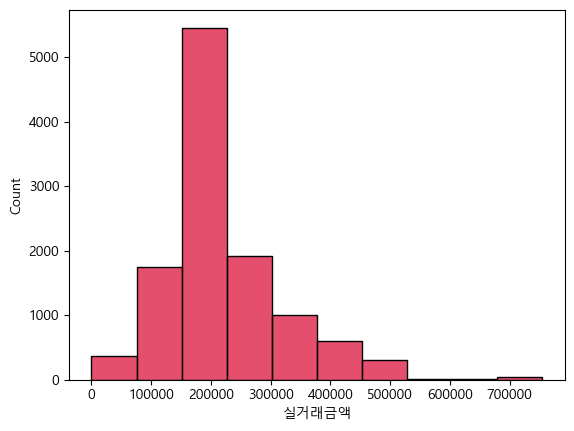

<Axes: xlabel='실거래금액', ylabel='Count'>

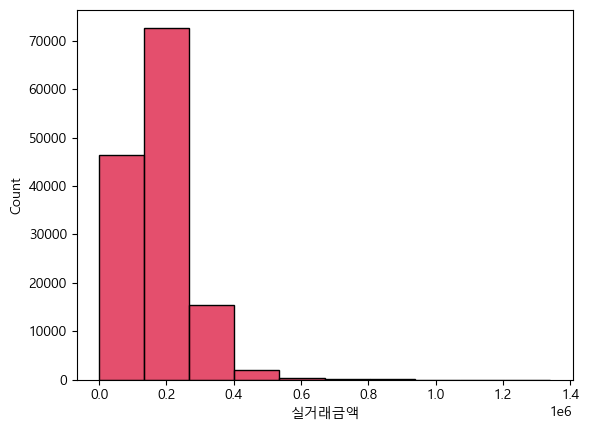

In [59]:
display(sns.histplot(data=df_payment.loc[df_payment['포맷']=='RED'], x='실거래금액', bins=10, color='#DC143C'))
plt.show()
display(sns.histplot(data=df_payment.loc[df_payment['포맷']=='올인원'], x='실거래금액', bins=10, color='#DC143C'))
plt.show()

<Axes: xlabel='포맷', ylabel='실거래금액'>

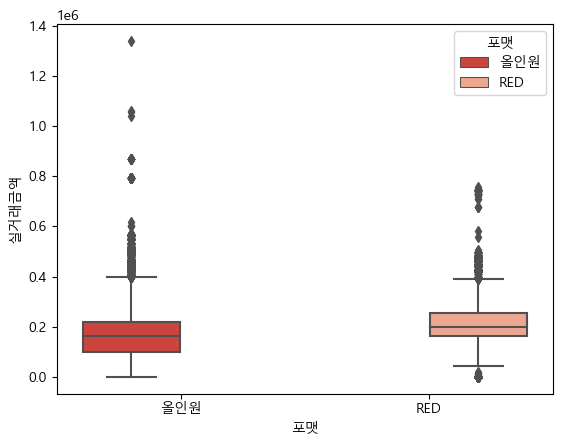

In [60]:
sns.boxplot(data=df_payment, x='포맷', y='실거래금액', hue='포맷', palette='Reds_r')

평균적으로, RED 강의가 올인원 강의보다 약 43,000원 더 비싸다.

최빈값 기준으로, RED 강의가 올인원 강의보다 약 35,000원 더 비싸다.

하지만, 최대값 기준으로 봤을 때 올인원 강의가 RED 보다 약580,000원 더 비싸다.

따라서, **가격으로 인해 RED 강의가 덜 판매되었다고 보기는 어렵다**.

## 7. 카테고리

### 1) 카테고리별 판매 건 수 비교

In [61]:
category_count = df_payment['카테고리'].value_counts().reset_index().set_axis(['카테고리', 'count'], axis=1) # 카테고리별 구매 건수
category_count

,카테고리,count
0,프로그래밍,47923
1,데이터 사이언스,24867
2,일러스트,14258
3,업무 생산성,13052
4,영상/3D,12981
5,마케팅,12023
6,부동산/금융,10143
7,디자인,9396
8,투자/재테크,2348
9,부업/창업,1018


카테고리별로 판매 건수를 비교한 그래프

<Axes: xlabel='카테고리', ylabel='count'>

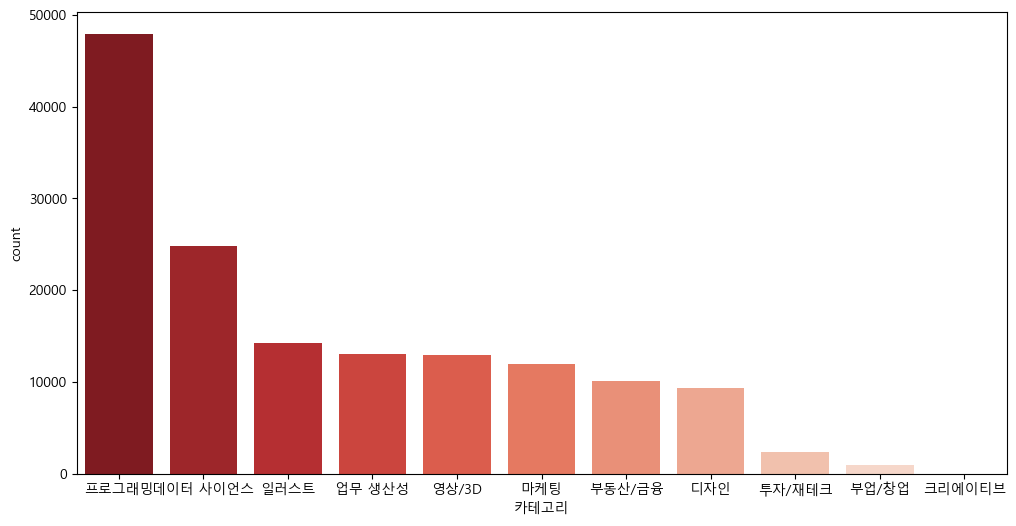

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(data=category_count, x='카테고리', y='count', palette='Reds_r')

프로그래밍 > 데이터 사이언스 > ... 순으로 가장 카테고리별 판매 건수가 많다.

### 2) 카테고리별 2개 이상 구매 고객 차지율

In [63]:
# 2개 이상 구매한 고객 데이터
client_over_1_index = df_payment['고객id'].value_counts()[df_payment['고객id'].value_counts() > 1].index
client_over_1 = df_payment[df_payment['고객id'].isin(client_over_1_index)]
client_over_1
# 그 사람들이 들은 강의의 카테고리
category_count_over_1 = client_over_1.groupby('카테고리')['고객id'].count().reset_index()
category_count_over_1

,카테고리,고객id
0,데이터 사이언스,19202
1,디자인,7258
2,마케팅,9275
3,부동산/금융,7864
4,부업/창업,788
5,업무 생산성,10092
6,영상/3D,10028
7,일러스트,11045
8,크리에이티브,1
9,투자/재테크,1804


In [64]:
payment_repayment = category_count.merge(category_count_over_1, how='left', on='카테고리').set_axis(['카테고리', '구매_count', '2개이상구매_count'], axis=1)
payment_repayment

,카테고리,구매_count,2개이상구매_count
0,프로그래밍,47923,36929
1,데이터 사이언스,24867,19202
2,일러스트,14258,11045
3,업무 생산성,13052,10092
4,영상/3D,12981,10028
5,마케팅,12023,9275
6,부동산/금융,10143,7864
7,디자인,9396,7258
8,투자/재테크,2348,1804
9,부업/창업,1018,788


In [65]:
# 재구매비율 확인
payment_repayment['2개이상구매차지율'] = payment_repayment['2개이상구매_count'] / payment_repayment['구매_count'] * 100
payment_repayment

,카테고리,구매_count,2개이상구매_count,2개이상구매차지율
0,프로그래밍,47923,36929,77.06
1,데이터 사이언스,24867,19202,77.22
2,일러스트,14258,11045,77.47
3,업무 생산성,13052,10092,77.32
4,영상/3D,12981,10028,77.25
5,마케팅,12023,9275,77.14
6,부동산/금융,10143,7864,77.53
7,디자인,9396,7258,77.25
8,투자/재테크,2348,1804,76.83
9,부업/창업,1018,788,77.41


2개 이상 구매한 사람들이 카테고리별로 더 선호하는 분야가 있는지 확인한 결과,
모든 카테고리에서 비슷하다는 것을 확인했다.

즉, **각 카테고리별로 재구매하는 사람들이 차지하는 비율은 비슷하다.(약77%)**

(크리에이티브의 경우, 숫자가 너무 작으니 그 결과는 신뢰성이 없어 무시한다)